In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [ ]:
Fdata =  pd.read_csv("fishdata2.csv",encoding= 'unicode_escape')
Fdata

: 

In [ ]:
Fdata.rename(columns={'2020':'Year', '6':'Month', '18':'Day', '14':'Hour', '30':'Minute', '33':'Second',
       'qCBrs9¥ R! Â¤cäÍFóInitializing.... Please Wait!':'Carbonmonoxide', 'Unnamed: 7':'PM2.5',
       'Unnamed: 8':'External_Temp', 'Unnamed: 9':'Humidity', 'Unnamed: 10':'Internal_Temp', 'Unnamed: 11':'Ignore'
},inplace = True)
Fdata

,Year,Month,Day,Hour,Minute,Second,Carbonmonoxide,PM2.5,External_Temp,Humidity,Internal_Temp,Ignore
0,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.00,27.19,4.39
1,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.00,27.19,4.38
2,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.00,27.19,4.38
3,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.00,27.19,4.41
4,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.00,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...
811941,2020.0,10.0,19,8,24.0,4.0,201,-165.0,25.0,95.00,25.94,4.17
811942,2020.0,10.0,19,8,24.0,8.0,201,-167.0,25.0,95.00,25.94,4.19
811943,2020.0,10.0,19,8,24.0,13.0,-168,25.0,95.0,25.94,4.18,NaN
811944,2020.0,10.0,19,8,24.0,16.0,201,-169.0,25.0,95.00,25.94,4.17


In [ ]:
Fdata.shape

(811946, 12)

In [ ]:
Fdata1 = pd.DataFrame(Fdata)
Fdata1

,Year,Month,Day,Hour,Minute,Second,Carbonmonoxide,PM2.5,External_Temp,Humidity,Internal_Temp,Ignore
0,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.00,27.19,4.39
1,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.00,27.19,4.38
2,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.00,27.19,4.38
3,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.00,27.19,4.41
4,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.00,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...
811941,2020.0,10.0,19,8,24.0,4.0,201,-165.0,25.0,95.00,25.94,4.17
811942,2020.0,10.0,19,8,24.0,8.0,201,-167.0,25.0,95.00,25.94,4.19
811943,2020.0,10.0,19,8,24.0,13.0,-168,25.0,95.0,25.94,4.18,NaN
811944,2020.0,10.0,19,8,24.0,16.0,201,-169.0,25.0,95.00,25.94,4.17


In [ ]:
Fdata1.isnull().sum()

Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
Second               0
Carbonmonoxide    1748
PM2.5               74
External_Temp       95
Humidity           103
Internal_Temp      103
Ignore            4538
dtype: int64

In [ ]:
Fdata1.dropna(subset = ['Carbonmonoxide','PM2.5','PM2.5','External_Temp','Humidity','Internal_Temp','Ignore'] , inplace = True)
Fdata1.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
Minute            0
Second            0
Carbonmonoxide    0
PM2.5             0
External_Temp     0
Humidity          0
Internal_Temp     0
Ignore            0
dtype: int64

In [ ]:
Fdata.shape

(811946, 12)

In [ ]:
Fdata1.describe()

,Year,Month,Day,Hour,Minute,Second,PM2.5,External_Temp,Humidity,Internal_Temp,Ignore
count,8.057290e+05,8.057290e+05,805729.000000,805729.000000,805729.000000,805729.000000,805729.000000,805729.000000,805729.000000,805729.000000,805729.000000
mean,2.038126e+03,2.580095e+00,18.485705,11.778356,29.475378,29.499549,-65.525206,30.474023,94.992290,28.621689,82.909025
std,7.213832e+03,2.528976e+03,26.703259,6.193480,17.316288,17.320449,66.753955,3.119297,2.190231,1.864235,1642.031334
min,2.140202e+02,-1.912020e+06,1.000000,0.000000,0.000000,0.000000,-240.000000,-999.000000,-999.000000,25.370000,2.650000
25%,2.020000e+03,7.000000e+00,13.000000,7.000000,14.000000,15.000000,-140.000000,29.000000,95.000000,27.060000,3.850000
50%,2.020000e+03,7.000000e+00,21.000000,12.000000,29.000000,30.000000,-51.000000,30.000000,95.000000,28.250000,4.020000
75%,2.020000e+03,8.000000e+00,26.000000,16.000000,44.000000,45.000000,-19.000000,32.000000,95.000000,30.250000,4.350000
max,3.212020e+06,2.020000e+03,22020.000000,30.000000,59.000000,59.000000,322.000000,310.000000,95.000000,95.000000,42020.000000


In [ ]:
Fdata1.drop('Year', axis ='columns', inplace = True)

In [ ]:
Fdata1.dtypes

Month             float64
Day                 int64
Hour                int64
Minute            float64
Second            float64
Carbonmonoxide     object
PM2.5             float64
External_Temp     float64
Humidity          float64
Internal_Temp     float64
Ignore            float64
dtype: object

In [ ]:
Fdata1['Month'] = Fdata1['Month'].astype(int)
Fdata1[['Carbonmonoxide' ]] = Fdata1[['Carbonmonoxide']].apply(pd.to_numeric, errors = 'coerce') 
Fdata1.dtypes

Month               int32
Day                 int64
Hour                int64
Minute            float64
Second            float64
Carbonmonoxide    float64
PM2.5             float64
External_Temp     float64
Humidity          float64
Internal_Temp     float64
Ignore            float64
dtype: object

In [ ]:
Fdata1.drop(Fdata1[Fdata1['Month'] < 0].index, inplace = True)
Fdata1.drop(Fdata1[Fdata1['Month'] > 12].index, inplace = True)
Fdata1.drop(Fdata1[Fdata1['External_Temp'] < 25].index, inplace = True)
Fdata1.drop(Fdata1[Fdata1['External_Temp'] > 30].index, inplace = True)
Fdata1['External_Temp'].fillna(Fdata1['External_Temp'].mean())
Fdata1.drop(Fdata1[Fdata1['Internal_Temp'] < 25].index, inplace = True)
Fdata1.drop(Fdata1[Fdata1['Internal_Temp'] > 35].index, inplace = True)
Fdata1['Internal_Temp'].fillna(Fdata1['Internal_Temp'].mean())
Fdata1.dropna(inplace = True)
Fdata1.describe()

,Month,Day,Hour,Minute,Second,Carbonmonoxide,PM2.5,External_Temp,Humidity,Internal_Temp,Ignore
count,433148.000000,433148.000000,433148.000000,433148.000000,433148.000000,433148.000000,433148.00000,433148.000000,433148.0,433148.000000,433148.000000
mean,7.601972,17.634545,12.056703,29.468974,29.516676,212.716884,-80.09847,28.726119,95.0,27.297373,78.658298
std,1.309702,9.536130,4.463805,17.334584,17.317372,50.739668,76.88155,0.981532,0.0,0.971478,1610.625978
min,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-239.00000,25.000000,95.0,25.370000,2.650000
25%,7.000000,8.000000,9.000000,14.000000,15.000000,180.000000,-156.00000,28.000000,95.0,26.620000,3.900000
50%,7.000000,21.000000,12.000000,29.000000,30.000000,199.000000,-74.00000,29.000000,95.0,27.190000,4.080000
75%,9.000000,25.000000,15.000000,44.000000,45.000000,259.000000,-19.00000,30.000000,95.0,27.750000,4.570000
max,10.000000,31.000000,23.000000,59.000000,59.000000,332.000000,77.00000,30.000000,95.0,31.560000,42020.000000


In [ ]:
Fdata1.shape

(433148, 11)

In [ ]:
Fdata1 = Fdata1[0:100000]
Fdata1

,Month,Day,Hour,Minute,Second,Carbonmonoxide,PM2.5,External_Temp,Humidity,Internal_Temp,Ignore
0,6,18,14,30.0,43.0,201.0,25.0,29.0,95.0,27.19,4.39
1,6,18,14,30.0,48.0,201.0,25.0,29.0,95.0,27.19,4.38
2,6,18,14,31.0,3.0,201.0,25.0,29.0,95.0,27.19,4.38
3,6,18,14,31.0,8.0,201.0,25.0,29.0,95.0,27.19,4.41
4,6,18,14,31.0,13.0,201.0,25.0,29.0,95.0,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...
148731,6,29,19,18.0,27.0,290.0,-79.0,30.0,95.0,29.06,4.76
148732,6,29,19,18.0,37.0,290.0,-85.0,30.0,95.0,29.06,4.79
148733,6,29,19,18.0,42.0,290.0,-79.0,30.0,95.0,29.06,4.79
148734,6,29,19,18.0,47.0,290.0,-84.0,30.0,95.0,29.06,4.78


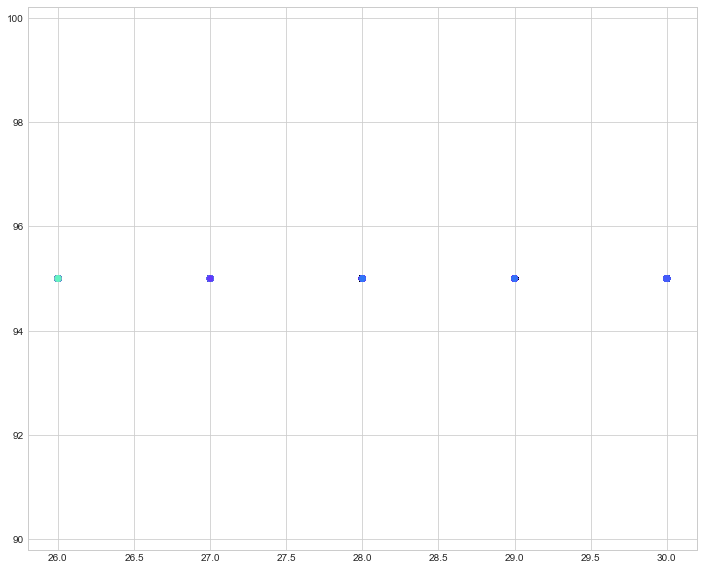

In [ ]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=10)
model.fit(Fdata1)
pred = model.fit_predict(Fdata1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(Fdata1["External_Temp"], Fdata1["Humidity"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

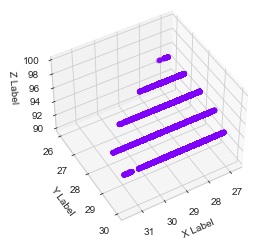

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = Fdata1['Internal_Temp']
y = Fdata1['External_Temp']
z = Fdata1['Humidity']
ax.scatter(x, y, z, c=z, cmap='rainbow');
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45, 60)
plt.show()